In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import random
import sklearn as sk
from time import time
import pickle
from Lopacity import *

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from rand_pert import rand_pertub
from rand_pert import link_mirage

In [5]:
g = nx.erdos_renyi_graph(n=200, p=0.15)

# Init graph 
degs = g.degree(g)
deg_count, opacity = init(g, degs)
# Prepare inverted opacity matrix:
inv_opacity = {}

In [3]:
face_orig = open("data/facebook-links.txt") 
f_arr = np.array(face_orig.readlines())
G = nx.Graph()

edgelist = []
for line in f_arr: 
    i, j, time = line.split('\t')
    edgelist.append((int(i), int(j)))

G.add_edges_from(edgelist)

### Split the graph

In [6]:
from attack import *

In [7]:
alpha = 0.25

In [8]:
G1, G2 = edge_split(g, alpha)

In [27]:
M = 50
t = 3

In [28]:
%%time
G_aux = link_mirage(G1, M, t)
G_san = link_mirage(G2, M, t)

CPU times: user 184 ms, sys: 36 ms, total: 220 ms
Wall time: 195 ms


In [29]:
%%time
G_aux_1 = rand_pertub(G1, M, t)
G_san_1 = rand_pertub(G2, M, t)

CPU times: user 100 ms, sys: 16 ms, total: 116 ms
Wall time: 97.1 ms


In [30]:
def fake_edges(G_orig, G_san):
    E1 = set(G_orig.edges())
    E2 = set(G_san.edges())
    return 1.-float(len(E1&E2))/len(E2)

def distortion(G_orig, G_san):
    E1 = set(G_orig.edges())
    E2 = set(G_san.edges())
    return float(len(E1|E2-E1&E2))/len(E1)

In [31]:
G1.number_of_edges()

957

In [32]:
G_aux.number_of_edges()

504

In [33]:
print("% of fake edges")
print(fake_edges(G1, G_aux))
print(fake_edges(G2, G_san))

print("% of distortion")
print(distortion(G1, G_aux))
print(distortion(G2, G_san))


% of fake edges
0.349206349206
0.435153583618
% of distortion
1.18390804598
1.19347496206


In [34]:
print("% of fake edges")
print(fake_edges(G1, G_aux_1))
print(fake_edges(G2, G_san_1))

print("% of distortion")
print(distortion(G1, G_aux_1))
print(distortion(G2, G_san_1))


% of fake edges
0.759493670886
0.798363095238
% of distortion
1.75235109718
1.81411229135


In [26]:
fake_edges(G1, G_aux)

0.4667931688804554

In [89]:
distortion(G1, G_aux)

1.7595212187159956

In [86]:
distortion(G2, G_san)

1.7729083665338645

In [90]:
e1 = G_aux.edges()

In [94]:
s1 = set()
for e in e1:
    s1.add(e[0])
    s1.add(e[1])

In [105]:
    import itertools

In [96]:
from itertools import combinations

In [109]:
c = set([(1, 3), (1,5)])

In [110]:
a1 = [1, 2, 3]
b1 = [3, 4, 5]

set(itertools.product(a1, b1))&c


{(1, 3), (1, 5)}

In [112]:
set(G1.neighbors(1))&set([2, 5, 6, 8])

{6, 8}

In [115]:
if set([1,2])&set([1]):
    print(True)

True


In [ ]:
len(set(G_aux.edges()) | set(G_san.edges()))

In [35]:
len(set(G_aux.edges()) | set(G_san.edges()))

2082

In [36]:
len(set(G_aux.edges()) & set(G_san.edges()))

118

In [26]:
G_san.edges()

False

In [22]:
def calc_distortion(G_orig, G_anon):
    for e in G_orig.edges():
        G

SyntaxError: unexpected EOF while parsing (<ipython-input-22-9385ca921ac7>, line 1)

In [15]:
X, Y = gen_trainset(G_aux, G_san, alpha, "data/test.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0.09813084112149532
Finished : 0.19626168224299065
Finished : 0.29439252336448596
Finished : 0.3925233644859813
Finished : 0.49065420560747663
Finished : 0.5887850467289719
Finished : 0.6869158878504673
Finished : 0.7850467289719626
Finished : 0.883177570093458
Finished : 0.9813084112149533
Start adding false examples
Finished : 0.0
Finished : 0.09836065573770492
Finished : 0.19672131147540983
Finished : 0.29508196721311475
Finished : 0.39344262295081966
Finished : 0.4918032786885246
Finished : 0.5901639344262295
Finished : 0.6885245901639344
Finished : 0.7868852459016393
Finished : 0.8852459016393442
Finished : 0.9836065573770492
Aux finished 0.4867820739746094 sec
Start adding positive examples
Finished : 0.09966777408637874
Finished : 0.19933554817275748
Finished : 0.29900332225913623
Finished : 0.39867109634551495
Finished : 0.4983388704318937
Finished : 0.5980066445182725
Finished : 0.6976744186046512
Finished : 

In [16]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)

CPU times: user 1.34 s, sys: 182 ms, total: 1.52 s
Wall time: 1.4 s


In [17]:
X_t, Y_t = gen_testset(G_aux, G_san, "data/test_test.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0.09183673469387756
Finished : 0.1836734693877551
Finished : 0.2755102040816326
Finished : 0.3673469387755102
Finished : 0.45918367346938777
Finished : 0.5510204081632653
Finished : 0.6428571428571429
Finished : 0.7346938775510204
Finished : 0.826530612244898
Finished : 0.9183673469387755
Start adding false examples
Finished : 0.0
Finished : 0.09183673469387756
Finished : 0.1836734693877551
Finished : 0.2755102040816326
Finished : 0.3673469387755102
Finished : 0.45918367346938777
Finished : 0.5510204081632653
Finished : 0.6428571428571429
Finished : 0.7346938775510204
Finished : 0.826530612244898
Finished : 0.9183673469387755
Test set generated in  0.7675600051879883 sec


In [18]:
forest.score(X_t, Y_t)

0.59693877551020413

In [22]:
## Apply anonimization
def anonimize(G):
    return G
G_aux = anonimize(G1)
G_san = anonimize(G2)

In [39]:
L = 2
theta = 0.5

In [40]:
def anonimize(g):
    t1 = time()
    result_optval2 = intersect_anonimize(g, L, theta, score='opt2', mode = 'val')
    tot_time = time()-t1
    print("Total time "+ str(tot_time))

    g1 = result_optval2['new_graph']
    dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
    print("Distortion "+ str(dist))
    return g1

In [42]:
def anonimize_orig(g):
    t1 = time()
    result_lomax = anonimize_lopacity(g=g, L=L, theta=theta, mode='max')
    print("Total time "+ str(time()-t1))

    # Storing results:
    g1 = result_lomax['new_graph']
    dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
    print("Distortion "+ str(dist))
    return g1

In [72]:
G_aux = anonimize(G1)

Edges removed: 
[(6, 144)]
Edges removed: 
[(13, 123)]
Edges removed: 
[(13, 87)]
Edges removed: 
[(5, 104)]
Edges removed: 
[(15, 198)]
Edges removed: 
[(0, 198)]
Edges removed: 
[(2, 135)]
Edges removed: 
[(4, 135)]
Edges removed: 
[(0, 156)]
Edges removed: 
[(2, 144)]
Edges removed: 
[(2, 155)]
Edges removed: 
[(2, 198)]
Edges removed: 
[(3, 173)]
Edges removed: 
[(24, 29)]
Edges removed: 
[(19, 106)]
Edges removed: 
[(12, 135)]
Edges removed: 
[(2, 156)]
Edges removed: 
[(3, 156)]
Edges removed: 
[(20, 156)]
Edges removed: 
[(19, 156)]
Edges removed: 
[(2, 191)]
Edges removed: 
[(5, 191)]
Edges removed: 
[(47, 198)]
Edges removed: 
[(15, 170)]
Edges removed: 
[(24, 156)]
Edges removed: 
[(8, 135)]
Edges removed: 
[(2, 48)]
Edges removed: 
[(24, 3)]
Edges removed: 
[(15, 191)]
Edges removed: 
[(5, 69)]
Edges removed: 
[(0, 141)]
Edges removed: 
[(18, 141)]
Edges removed: 
[(12, 141)]
Edges removed: 
[(9, 141)]
Edges removed: 
[(4, 32)]
Edges removed: 
[(7, 84)]
Edges removed: 
[(17,

In [73]:
G_san = anonimize(G2)

Edges removed: 
[(35, 75)]
Edges removed: 
[(51, 167)]
Edges removed: 
[(35, 128)]
Edges removed: 
[(21, 195)]
Edges removed: 
[(58, 178)]
Edges removed: 
[(15, 151)]
Edges removed: 
[(22, 97)]
Edges removed: 
[(2, 169)]
Edges removed: 
[(6, 124)]
Edges removed: 
[(47, 198)]
Edges removed: 
[(30, 186)]
Edges removed: 
[(41, 120)]
Edges removed: 
[(4, 110)]
Edges removed: 
[(12, 160)]
Edges removed: 
[(43, 28)]
Edges removed: 
[(6, 144)]
Edges removed: 
[(18, 168)]
Edges removed: 
[(19, 134)]
Edges removed: 
[(56, 186)]
Edges removed: 
[(11, 34)]
Edges removed: 
[(4, 135)]
Edges removed: 
[(27, 7)]
Edges removed: 
[(84, 134)]
Edges removed: 
[(15, 149)]
Edges removed: 
[(1, 35)]
Edges removed: 
[(46, 160)]
Edges removed: 
[(71, 121)]
Edges removed: 
[(33, 68)]
Edges removed: 
[(68, 165)]
Edges removed: 
[(0, 198)]
Edges removed: 
[(74, 66)]
Edges removed: 
[(41, 118)]
Edges removed: 
[(4, 9)]
Edges removed: 
[(5, 86)]
Edges removed: 
[(83, 167)]
Edges removed: 
[(67, 167)]
Edges removed

In [12]:
str(G_aux.number_of_edges())+  ' vs '  +  str(G_san.number_of_edges())

'956 vs 1271'

### Train data

In [32]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(test_set)
y_true = test_labels
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

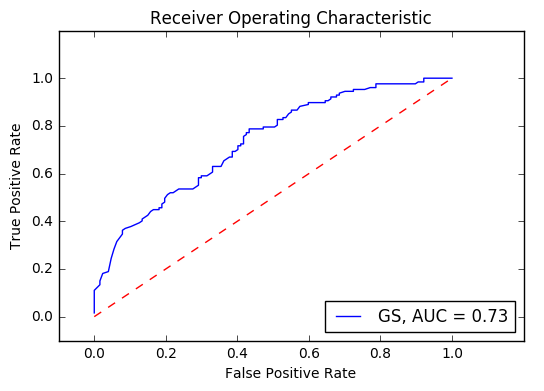

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(test_set)
y_true = test_labels
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

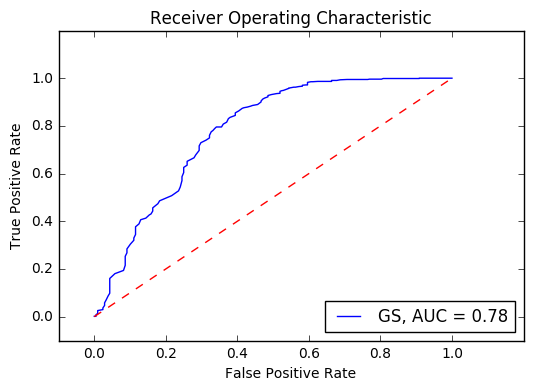

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1]:
import community

In [2]:
import networkx as nx

In [3]:
G = nx.karate_club_graph()

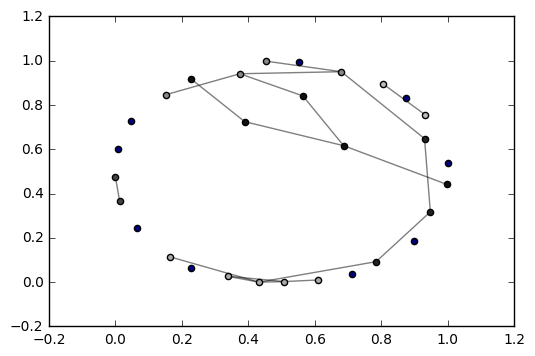

In [8]:
import community
    import networkx as nx
    import matplotlib.pyplot as plt

    #better with karate_graph() as defined in networkx example.
    #erdos renyi don't have true community structure
    G = nx.erdos_renyi_graph(30, 0.05)

    #first compute the best partition
    partition = community.best_partition(G)

    #drawing
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G)
    count = 0.
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                    node_color = str(count / size))


    nx.draw_networkx_edges(G,pos, alpha=0.5)
    plt.show()

In [4]:
partition = community.best_partition(G)
coms = set(partition.values())

In [6]:
%load rand_pert.py

ValueError: 'rand_pert.py' was not found in history, as a file, url, nor in the user namespace.

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/hdalpha/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['partition']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
import rand_pert

ImportError: No module named rand_pert

In [24]:
for com in coms:
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print("Community ", com, ": ", list_nodes)
    G_ = nx.subgraph(G, list_nodes)
    print(G_.edges())

('Community ', 0, ': ', [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21])
[(0, 1), (0, 2), (0, 3), (0, 7), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (2, 3), (2, 7), (2, 9), (2, 13), (3, 7), (3, 12), (3, 13)]
('Community ', 1, ': ', [4, 5, 6, 10, 16])
[(16, 5), (16, 6), (10, 4), (10, 5), (4, 6), (5, 6)]
('Community ', 2, ': ', [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33])
[(32, 33), (32, 8), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (32, 30), (33, 8), (33, 14), (33, 15), (33, 18), (33, 20), (33, 22), (33, 26), (33, 29), (33, 30), (8, 30), (26, 29)]
('Community ', 3, ': ', [23, 24, 25, 27, 28, 31])
[(23, 25), (23, 27), (24, 25), (24, 27), (24, 31), (25, 31), (28, 31)]


In [10]:
partition

{0: 0,
 1: 1,
 2: 2,
 3: 0,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 7,
 10: 1,
 11: 8,
 12: 9,
 13: 3,
 14: 10,
 15: 9,
 16: 11,
 17: 0,
 18: 9,
 19: 10,
 20: 9,
 21: 12,
 22: 1,
 23: 7,
 24: 0,
 25: 13,
 26: 7,
 27: 0,
 28: 14,
 29: 9}